In [6]:
!pip install nltk

In [7]:
!pip install spacy

In [8]:
!pip install WordCloud

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # helpful when we have to perform special operations on strings
import spacy # NLP language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [4]:
df = pd.read_csv('Elon_musk.csv',encoding='ISO-8859-1')

In [5]:
df.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [9]:
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head(3)

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!


In [10]:
df.shape

(1999, 1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


In [15]:
#Strpping unwanted spaces in Tweets

tweets = [Text.strip() for Text in df.Text]

tweets = [Text for Text in tweets if Text]

tweets[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [16]:
tweets

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [17]:
# Joining the tweets into one string/text

text = ' '.join(tweets)
text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [18]:
#Removing all the unwanted commas, symbols from our text

no_punc_text = text.translate(str.maketrans('', '', string.punctuation))
no_punc_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewal

In [19]:
import nltk #Natural Language Tool Kit, importing nltk library, it is going to have different function that allow us to perform Tokenization, Stemming etc

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [20]:
#Tokenization

from nltk.tokenize import word_tokenize #improting tokenization function

text_tokens = word_tokenize(no_punc_text)
print(text_tokens)

['kunalb11', 'I\x92m', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'httpstcozGxJFDzzrM', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'GiveDirectly', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'kanyewest', 'httpstco3rWE9uHSTS', 'geoffkeighley', 'UnrealEngine', 'It\x9

In [24]:
#Top 10 tokens
print((text_tokens[0:10]))

['kunalb11', 'I\x92m', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with']


In [29]:
stop.head()

,a
0,a's
1,able
2,about
3,above
4,according


In [34]:
#Removing Stop-Words

from nltk.corpus import stopwords

nltk.download('stopwords') #downloading Stop-Words into our current file

my_stop_words = stopwords.words('english') #We want all our Stop-Words present in English language
my_stop_words.append('the')
my_stop_words.append('Its')

no_stop_tokens = [word for word in text_tokens if not word in my_stop_words] #Removing Stop-Words
print(no_stop_tokens[0:10]) #as we can see in upper cell 'Its' 'for' are removed

['kunalb11', 'I\x92m', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [35]:
#Normalize the data - converting every single text into lowercase


lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:15]) #macbook text before normalizing the data was Macbook now its converted to lowercase macbook

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview']


In [37]:
#Stemming

from nltk.stem import PorterStemmer

ps = PorterStemmer()

stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:15])

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview']


In [38]:
!python -m spacy download en

2023-10-15 13:26:57.754413: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 26.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [39]:
# NLP english language model of spacy library

nlp = spacy.load('en_core_web_sm')

In [40]:
#combining every tweets together

doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

kunalb11 Im alien IDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried joerogan Spotify Great interview gtera27 Doge underestimated teslacn Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox httpstco9WFKMYu2oj Frodo underdoge All thought would fail


In [41]:
#Creating Tokens using Lemma function

lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['kunalb11', 'I\x92m', 'alien', 'IDAACarmack', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'Doge', 'underestimate', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last']


In [42]:
#Feature Extraction

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

x = vectorizer.fit_transform(lemmas)

In [43]:
vectorizer.vocabulary

In [46]:
#Converting entire vectorizer.vocabulary into DataFrame

pd.DataFrame(vectorizer.vocabulary_,columns=vectorizer.vocabulary_.keys(),index=[0]).T

,0
kunalb11,2702
alien,231
idaacarmack,2440
ray,3621
trace,4498
...,...
httpstcowjrzibkh1h,2332
click,774
samwise,3821
gamgee,1530


In [47]:
#Sorting it from biggest to smallest value

pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=False).head()

,0
ðogecoin,4970
zzcool,4969
zwiebelbach,4968
zubinanary,4967
zshauladventure,4966


In [48]:
print(vectorizer.vocabulary_)

{'kunalb11': 2702, 'alien': 231, 'idaacarmack': 2440, 'ray': 3621, 'trace': 4498, 'cyberpunk': 962, 'hdr': 1677, 'nextlevel': 3157, 'have': 1671, 'try': 4532, 'joerogan': 2622, 'spotify': 4116, 'great': 1609, 'interview': 2551, 'gtera27': 1628, 'doge': 1115, 'underestimate': 4665, 'teslacn': 4343, 'congratulations': 856, 'tesla': 4337, 'china': 740, 'amazing': 257, 'execution': 1326, 'last': 2721, 'year': 4938, 'now': 3197, 'next': 3156, 'even': 1298, 'happy': 1658, 'new': 3153, 'ox': 3314, 'httpstco9wfkmyu2oj': 1867, 'frodo': 1494, 'underdoge': 4664, 'all': 234, 'thought': 4422, 'would': 4913, 'fail': 1362, 'himself': 1723, 'httpstcozgxjfdzzrm': 2400, 'owensparks': 3311, 'flcnhvy': 1436, 'anonyx10': 286, 'haha': 1643, 'thanks': 4381, 'indeed': 2489, 'tweets': 4555, 'definitely': 1017, 'represent': 3704, 'realworld': 3646, 'time': 4441, 'allocation': 236, 'the': 4388, 'entertaining': 1254, 'outcome': 3291, 'likely': 2783, 'givedirectly': 1579, 'just': 2649, 'send': 3889, 'agree': 200, 

In [49]:
#Converting it into an Array

print(vectorizer.get_feature_names_out()[50:100])
print(x.toarray()[50:100])

['23' '230' '24' '240am' '247teslanew' '25' '250' '250kw' '25d'
 '25gunsteslacom' '25k' '25th' '28' '28delayslater' '28th' '29' '2k' '2nd'
 '2v' '30' '300' '301' '304' '304l' '31' '33' '330' '360' '37' '3800'
 '394' '39a' '3d' '3rd' '40' '400' '42' '420' '4227' '430' '43rd' '445pm'
 '448' '4530000' '45thspacewe' '4680' '479000' '48' '4d' '4th']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [50]:
print(x.toarray().shape)

(15794, 4971)


In [51]:
#Bi-Grams & Tri-Grams

vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(3,3),max_features = 100)

bow_matrix_ngram =vectorizer_ngram_range.fit_transform(tweets)

In [52]:
bow_matrix_ngram

<1999x100 sparse matrix of type '<class 'numpy.int64'>'
	with 485 stored elements in Compressed Sparse Row format>

In [53]:
print(vectorizer_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

['2192 https co' '60 starlink satellites'
 'ajtourville comma_ai tesmanian_com'
 'alex_avoigt mike_zimon wholemarsblog' 'also https co' 'are going to'
 'as soon as' 'astrobehnken and astro_doug' 'at https co' 'be able to'
 'brendan2908 bocachicagal nasaspaceflight'
 'caspar_stanley ercxspace marcushousegame' 'cfs_energy cup_plasma mit'
 'confirmed https co' 'course still love' 'crew dragon first'
 'dragon first operational' 'droneship https co' 'entertaining outcome is'
 'ercxspace marcushousegame felixschlang'
 'erdayastronaut josh_bickett ajtourville'
 'erdayastronaut queue_max nasaspaceflight' 'falcon first stage'
 'first operational mission' 'first stage has' 'flight https co'
 'from the space_station' 'futurejurvetson cfs_energy cup_plasma'
 'haha https co' 'has landed on' 'home to earth'
 'icannot_enough flcnhvy tesla' 'in https co' 'is 0001f525 0001f525'
 'is https co' 'it https co' 'it should be' 'it will be'
 'jgrano305 teslaratiteam teslarati' 'josh_bickett ajtourville spacex

In [54]:
#TF-IDF Vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer #importing the library


vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(2,3), max_features = 10)

tf_idf_matrix_n_gram_max_features = vectorizer_n_gram_max_features.fit_transform(tweets) #fitting it into original first dataset tweets

print(tf_idf_matrix_n_gram_max_features.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [55]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS #Import WordClous as well as STOPWORDS

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off");

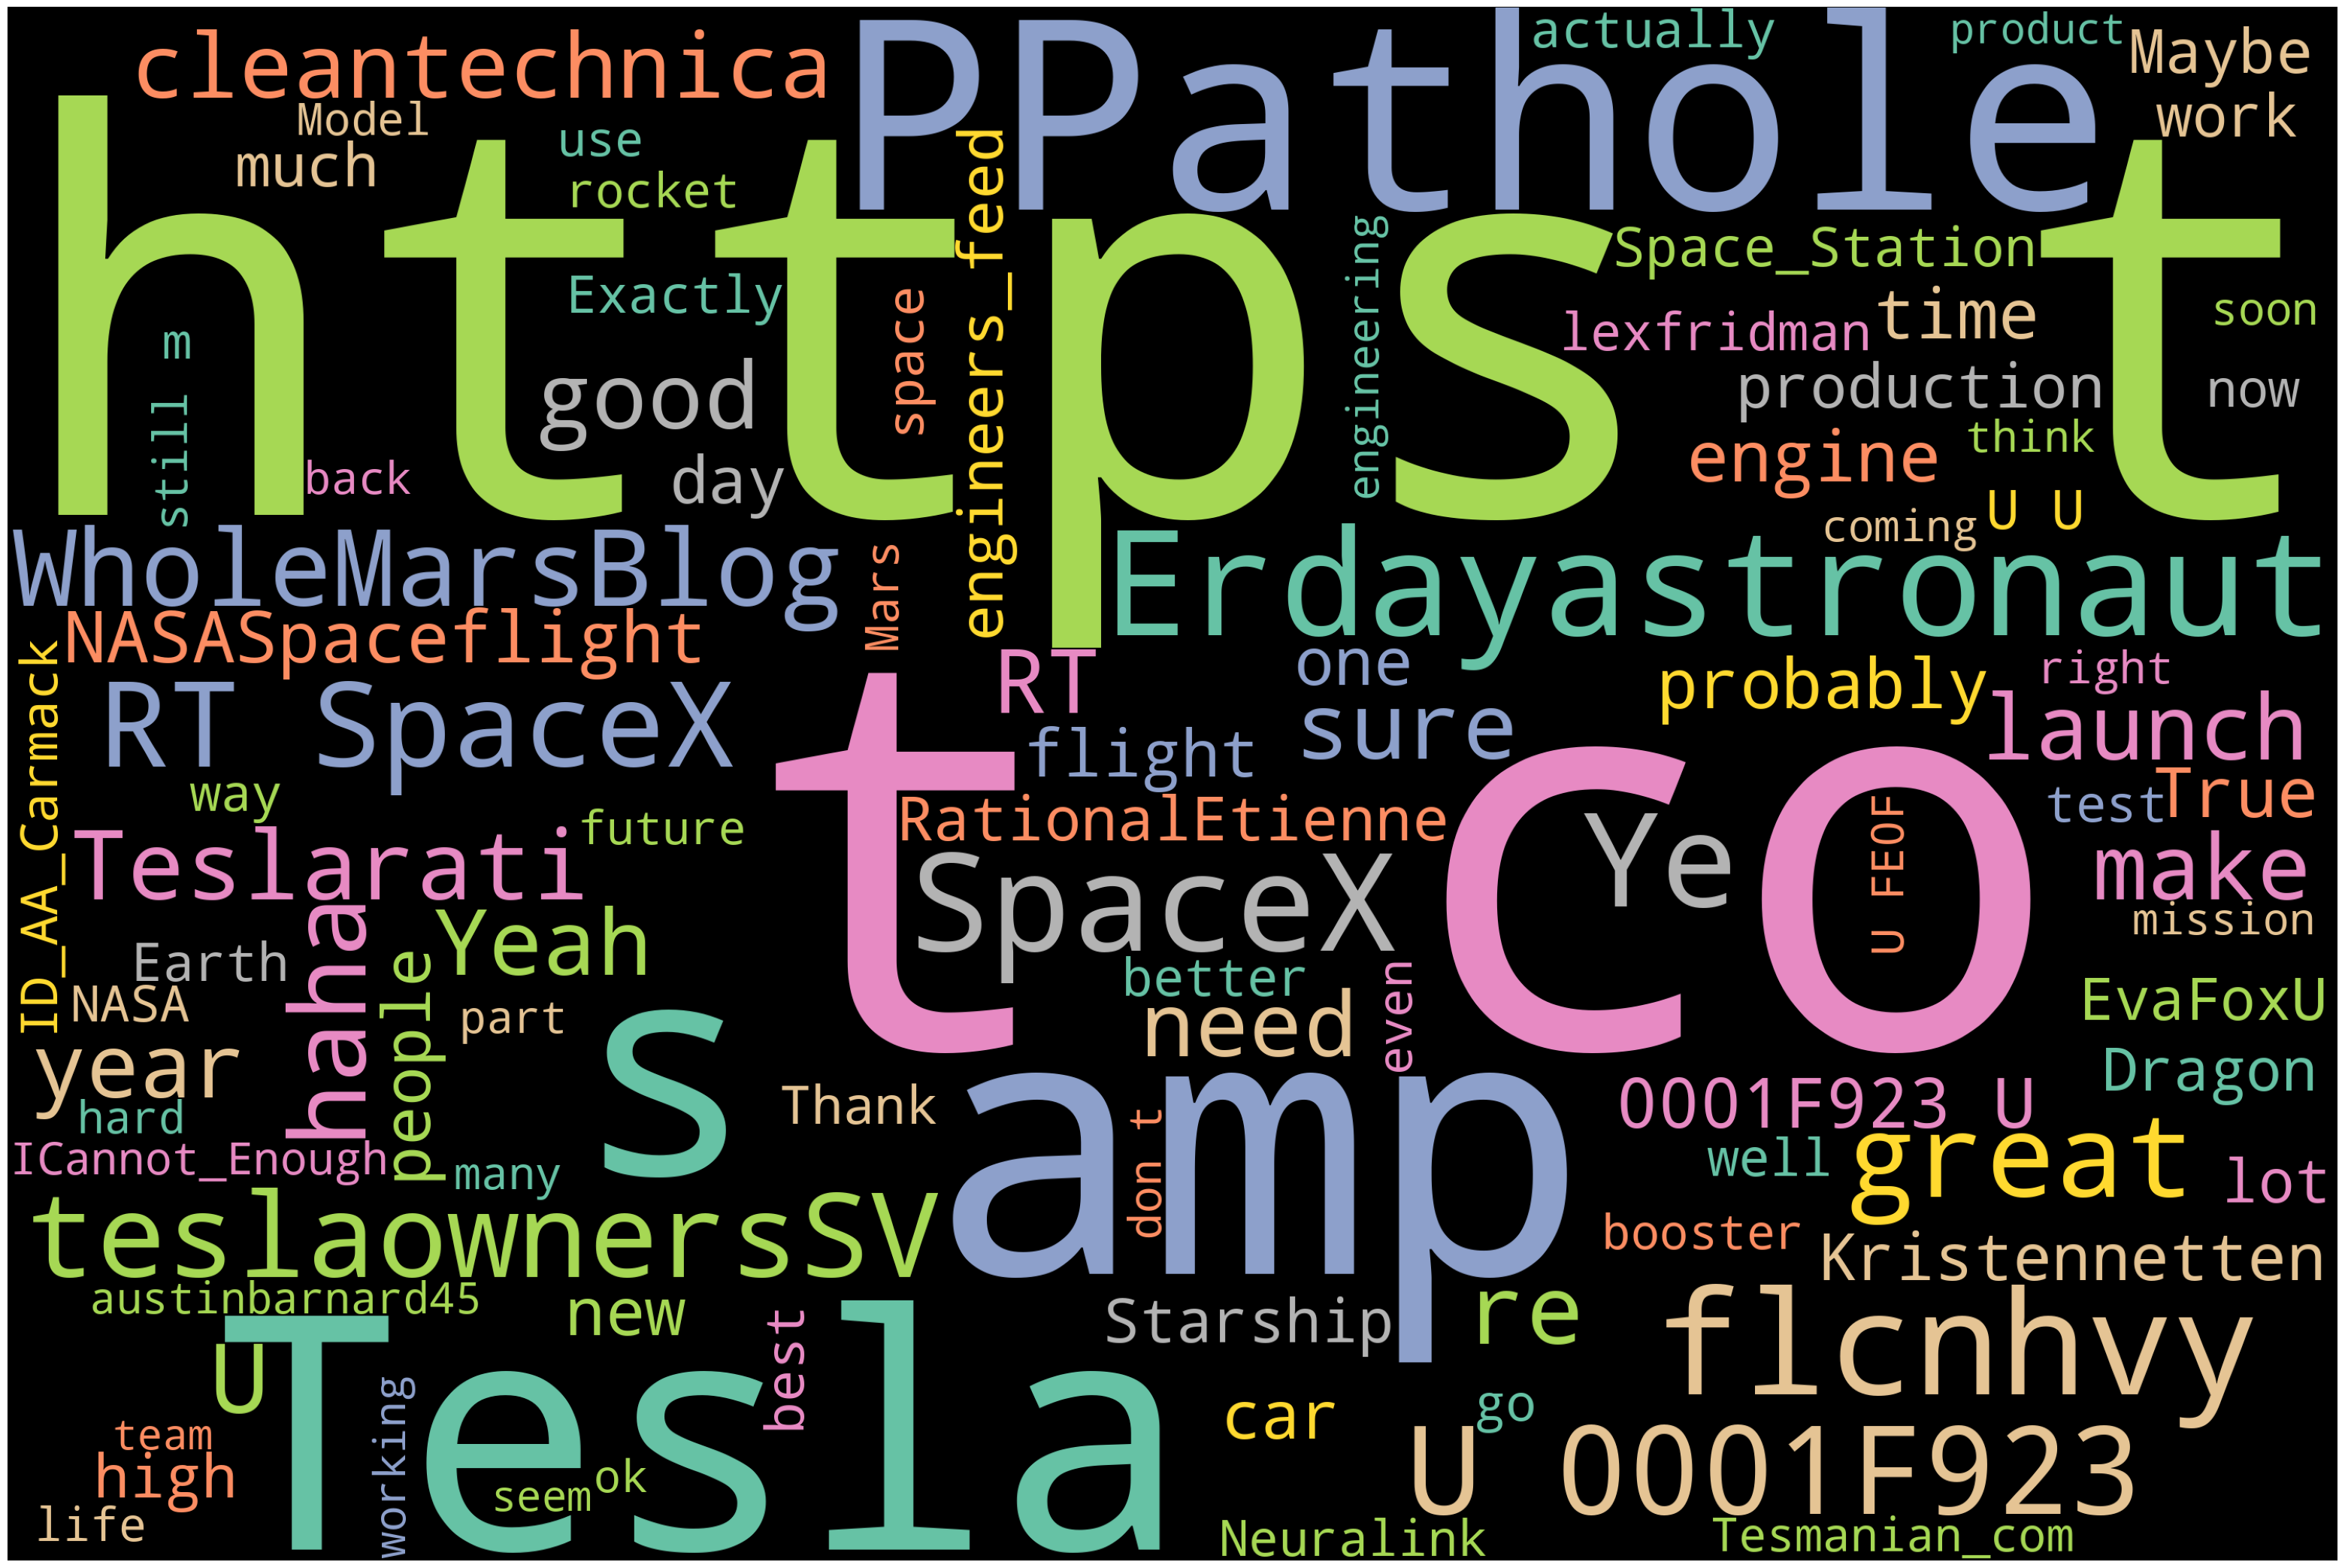

In [58]:
# Generate wordcloud

stopwords = STOPWORDS #initializing or starting the function

wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)

plot_cloud(wordcloud)
#Biggest word is the most occuring one

In [59]:
#Emotion Mining

#Sentiment analysis

afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [60]:
#Reading the Elon Musk dataset again

df = pd.read_csv('Elon_musk.csv',encoding='ISO-8859-1')
df.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [61]:
#Strpping unwanted spaces in Tweets

tweets = [Text.strip() for Text in df.Text]

tweets = [Text for Text in tweets if Text]

tweets[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [62]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [63]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(tweets))
sentences[5:15]

['Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O @freewalletorg Any crypto wallet that won\x92t give you your private keys should be avoided at all costs @freewalletorg Your app sucks RT @SpaceX: NASA has selected Falcon Heavy to launch the first two elem

In [64]:
#Converting above sentences into dataframe

sent_df = pd.DataFrame(sentences, columns=['sentence']) #creating dataframe, pd.DataFrame(sentences (above variable where we combined all the sentences), column name = ['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
922,"@kenyanwalstreet Not actually a payout, just a..."
923,"It may never pay out, as the stock cant b ht..."
924,Details Aug 28.
925,AI symbiosis while u wait @vistacruiser7 @flcn...


In [65]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [66]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text) #
        print(sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score #for word in sentence: calculate the overall sentence score, it will calculate the overall sentiment score of sentence and will ive it the sent_score variable

In [68]:
# test that it works
calculate_sentiment(text = 'fine')

fine


2

In [69]:
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
922,"@kenyanwalstreet Not actually a payout, just a..."
923,"It may never pay out, as the stock cant b ht..."
924,Details Aug 28.
925,AI symbiosis while u wait @vistacruiser7 @flcn...


In [70]:
#Adding all the sentiment total or overall scores of per sentences or reviews into DataFrame sent_df

sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)  #calculating the sentiment of every single sentences

@kunalb11 Im an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.
Have you tried it?
@joerogan @Spotify Great interview!
@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.
Now on to the next for even more!!
Happy New Year of the Ox!
https://t.co/9WFKMYu2oj Frodo was the underdoge,
All thought he would fail,
Himself most of all.
https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!
Tweets definitely do not represent real-world time allocation.
The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine Its getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F923

In [71]:
sent_df

,sentence,sentiment_value
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0
1,Have you tried it?,0
2,@joerogan @Spotify Great interview!,3
3,@gtera27 Doge is underestimated @teslacn Congr...,3
4,Now on to the next for even more!!,0
...,...,...
922,"@kenyanwalstreet Not actually a payout, just a...",0
923,"It may never pay out, as the stock cant b ht...",-4
924,Details Aug 28.,0
925,AI symbiosis while u wait @vistacruiser7 @flcn...,-2


In [72]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value
226,"@PPathole @karpathy For a second there, I thou...",11
161,@harsimranbansal @heydave7 It will most likely...,11
820,Might be able to https://t.co/FB7e5nOq2E @Pri...,11
186,"Also, w https://t.co/IYdKttVsqk @cleantechnic...",12
81,@teslaownersSV This is a good one @MrBeastYT I...,13
648,Its https://t.co/IxhyT6NuiC @Teslarati Tesla...,13
588,The open areas https://t.co/rabjKrtQlw @Sav...,14
105,@Erdayastronaut @SpaceX Was also thinking that...,16
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",16
722,We just havent observed the https://t.co/mez...,17


In [73]:
#Sentiment score of the tweets

sent_df['sentiment_value'].describe()

count    927.000000
mean       1.348436
std        2.688761
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       17.000000
Name: sentiment_value, dtype: float64

In [75]:
sent_df['sentiment_value'].mean()

1.348435814455232

In [80]:
# Sentiment score of the whole review

sent_df[sent_df['sentiment_value']<=0].head()
#less than <0 means negative sentiments and equals = 0 means neutral sentiment(neither negative or positive)

,sentence,sentiment_value
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0
1,Have you tried it?,0
4,Now on to the next for even more!!,0
5,Happy New Year of the Ox!,0
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2


In [81]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence'].tolist()[0]

#this is the highest negative sentiment or emotion present

'Also, the road to hell is mostly paved with bad intentions.'

In [82]:
sent_df['index'] = range(0,len(sent_df))

In [83]:
sent_df

,sentence,sentiment_value,index
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,0
1,Have you tried it?,0,1
2,@joerogan @Spotify Great interview!,3,2
3,@gtera27 Doge is underestimated @teslacn Congr...,3,3
4,Now on to the next for even more!!,0,4
...,...,...,...
922,"@kenyanwalstreet Not actually a payout, just a...",0,922
923,"It may never pay out, as the stock cant b ht...",-4,923
924,Details Aug 28.,0,924
925,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,925


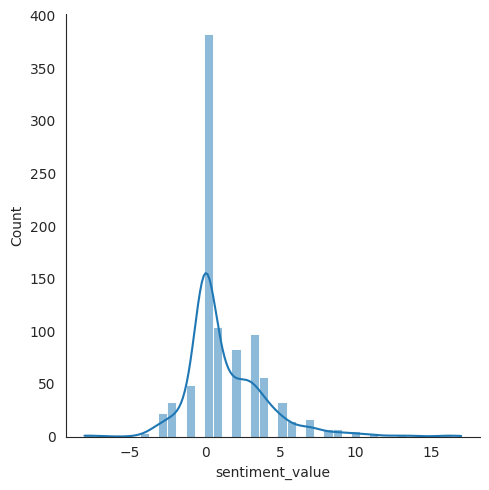

In [84]:
#Plotting using distribution to see the overall sentiment or emotion by visualization

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style(style='white')

sns.displot(data=sent_df,x='sentiment_value',kde=True)
plt.show()


#the overall sentiment value is the mean/average is lying somewhere around 0

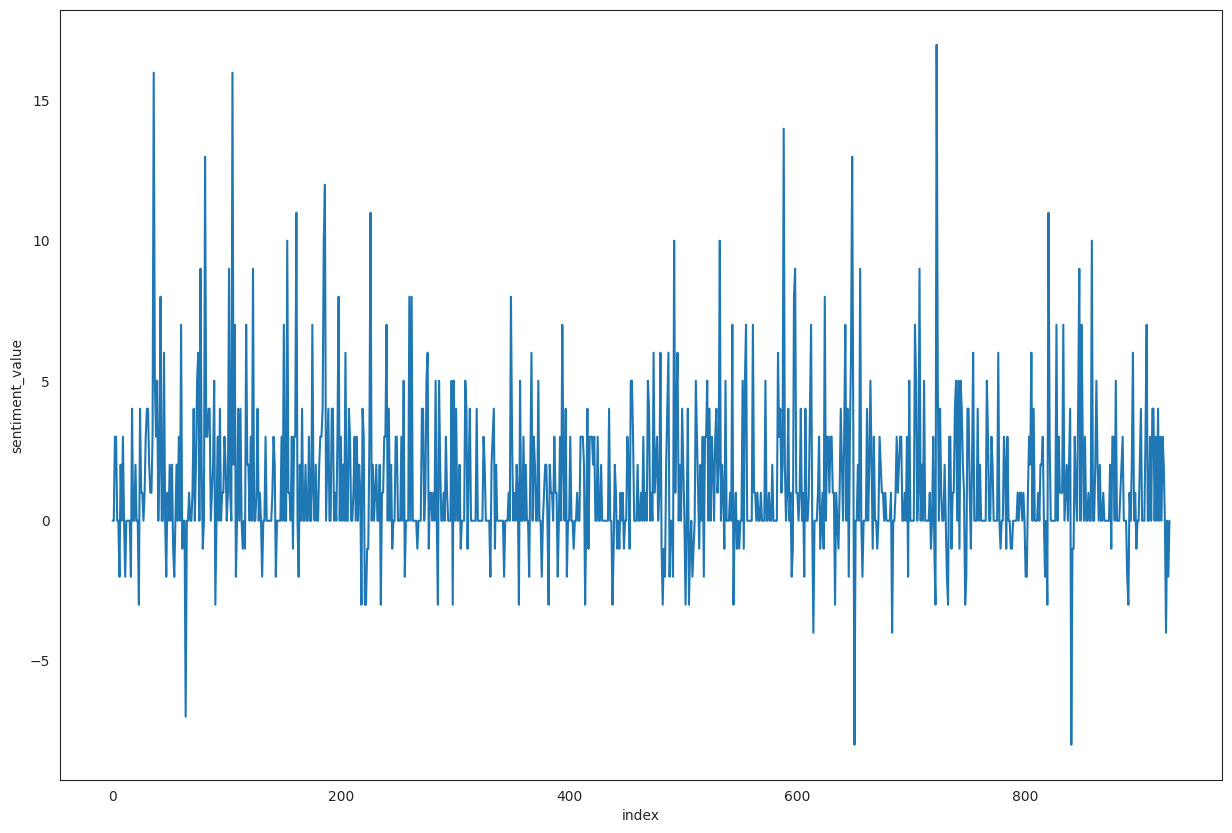

In [85]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)
plt.show()

#By observing the plot we can say it is fluctuating around the mean value, so the overall sentiment or emotion we can say is Neutral and some positive

In [89]:
#Word Count

sent_df['Word_Count'] = sent_df['sentence'].apply(lambda x: len(str(x).split(' ')))
sent_df.head(10)

,sentence,sentiment_value,index,Word_Count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,0,13
1,Have you tried it?,0,1,4
2,@joerogan @Spotify Great interview!,3,2,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,3,13
4,Now on to the next for even more!!,0,4,8
5,Happy New Year of the Ox!,0,5,6
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,6,12
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...,2,7,10
8,Tweets definitely do not represent real-world ...,0,8,8
9,The most entertaining outcome is the most like...,3,9,109


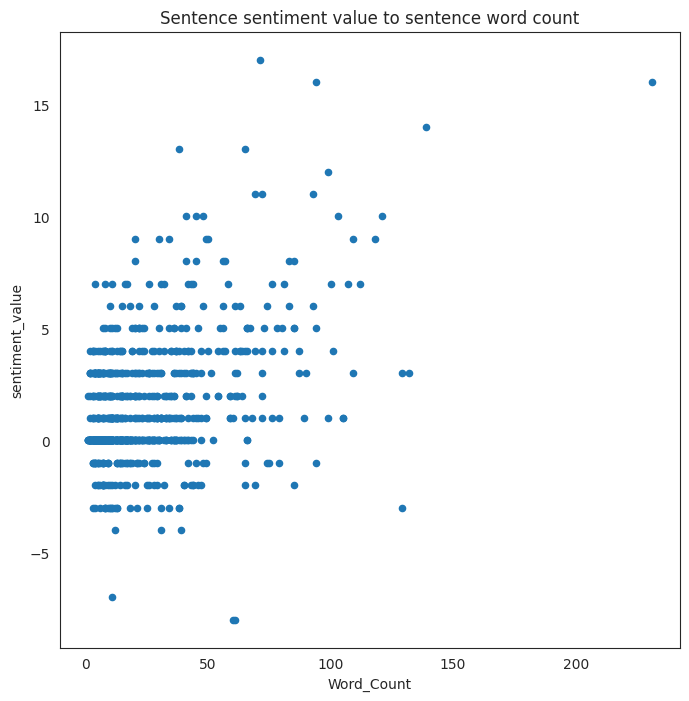

In [90]:
sent_df.plot.scatter(x='Word_Count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')
plt.show()